# Assignment 5:
### รหัสนักศึกษา: 67130701703
### ชื่อ-นามสกุล: ณัฐพล โคนพันธ์
### หลักสูตร: SED

## Imbalanced Data Classification & Model Deployment

- Understand the challenges of imbalanced classification.
- Train different models with various resampling techniques.
- Compare model performance using ROC and PR curves.
- Deploy the best-performing model using Streamlit.


#### 1. Install Required Libraries

Ensure you have the necessary libraries installed:

pip install imbalanced-learn scikit-learn matplotlib seaborn streamlit


## **2. Load and Explore the Dataset**  
Select a dataset from [`imbalanced-learn datasets`](https://imbalanced-learn.org/stable/datasets/index.html). Example: `fetch_datasets` provides multiple datasets.

In [ ]:
import pandas as pd
import numpy as np
from imblearn.datasets import fetch_datasets


In [97]:
sick_euthyroid = fetch_datasets()['sick_euthyroid']

In [105]:
X = sick_euthyroid['data']
y = sick_euthyroid['target']
np.unique(y, return_counts = True)

(array([-1,  1], dtype=int64), array([2870,  293], dtype=int64))

## **3. Train-Test Split**  

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=77)

## **4. Train Models**  

### **4.1 Baseline Model (Logistic Regression)**

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [109]:
LR_baseline = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred_LR_baseline = LR_baseline.predict(X_test)
print(classification_report(y_test, y_pred_LR_baseline))

              precision    recall  f1-score   support

          -1       0.95      0.98      0.97       576
           1       0.75      0.53      0.62        57

    accuracy                           0.94       633
   macro avg       0.85      0.75      0.79       633
weighted avg       0.94      0.94      0.94       633



### **4.2 Model with Undersampling (Logistic Regression)**  

In [110]:
from imblearn.under_sampling import RandomUnderSampler
print("Before Undersampling", np.unique(y_train, return_counts = True))
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print("After Undersampling", np.unique(y_train_rus, return_counts = True))

LR_Undersampling = LogisticRegression(max_iter=1000).fit(X_train_rus, y_train_rus)
y_pred_LR_Undersampling = LR_Undersampling.predict(X_test)
print(classification_report(y_test, y_pred_LR_Undersampling))

Before Undersampling (array([-1,  1], dtype=int64), array([2294,  236], dtype=int64))
After Undersampling (array([-1,  1], dtype=int64), array([236, 236], dtype=int64))
              precision    recall  f1-score   support

          -1       0.98      0.89      0.94       576
           1       0.44      0.86      0.58        57

    accuracy                           0.89       633
   macro avg       0.71      0.88      0.76       633
weighted avg       0.94      0.89      0.90       633



### **4.3 Model with Oversampling (Logistic Regression)**  

In [111]:
from imblearn.over_sampling import RandomOverSampler
print("Before Oversampling", np.unique(y_train, return_counts = True))
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print("After Oversampling", np.unique(y_train_ros, return_counts = True))

LR_Oversampling = LogisticRegression(max_iter=1000).fit(X_train_ros, y_train_ros)
y_pred_LR_Oversampling = LR_Oversampling.predict(X_test)
print(classification_report(y_test, y_pred_LR_Oversampling))


Before Oversampling (array([-1,  1], dtype=int64), array([2294,  236], dtype=int64))
After Oversampling (array([-1,  1], dtype=int64), array([2294, 2294], dtype=int64))
              precision    recall  f1-score   support

          -1       0.98      0.90      0.94       576
           1       0.46      0.82      0.59        57

    accuracy                           0.90       633
   macro avg       0.72      0.86      0.77       633
weighted avg       0.93      0.90      0.91       633



### **4.4 Random Forest Model (No Resampling)**  

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
rf = RandomForestClassifier(random_state=77).fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          -1       0.97      0.99      0.98       576
           1       0.89      0.72      0.80        57

    accuracy                           0.97       633
   macro avg       0.93      0.86      0.89       633
weighted avg       0.97      0.97      0.97       633



## **5. Compare Model Performance**  

### **5.1 Plot ROC Curve & ROC-AUC Score**

In [117]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt 


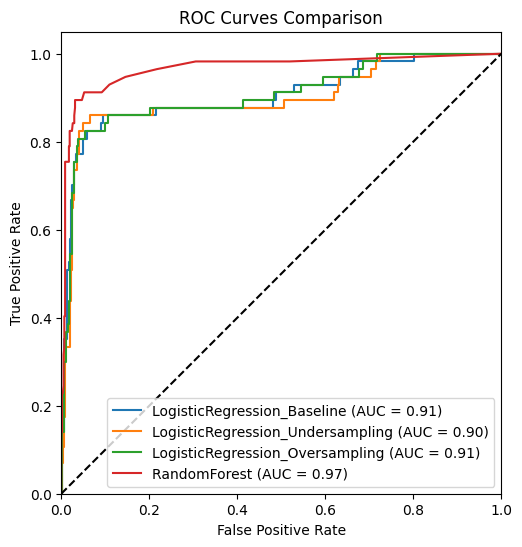

In [118]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
RocCurveDisplay.from_estimator(LR_baseline, X_test, y_test, name= 'LogisticRegression_Baseline', ax=plt.gca())
RocCurveDisplay.from_estimator(LR_Undersampling, X_test, y_test, name= 'LogisticRegression_Undersampling', ax=plt.gca())
RocCurveDisplay.from_estimator(LR_Oversampling, X_test, y_test, name= 'LogisticRegression_Oversampling', ax=plt.gca())
RocCurveDisplay.from_estimator(rf, X_test, y_test, name= 'RandomForest', ax=plt.gca())
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')

### **5.2 Plot PR Curve & PR-AUC Score**  

In [119]:
from sklearn.metrics import precision_recall_curve, average_precision_score

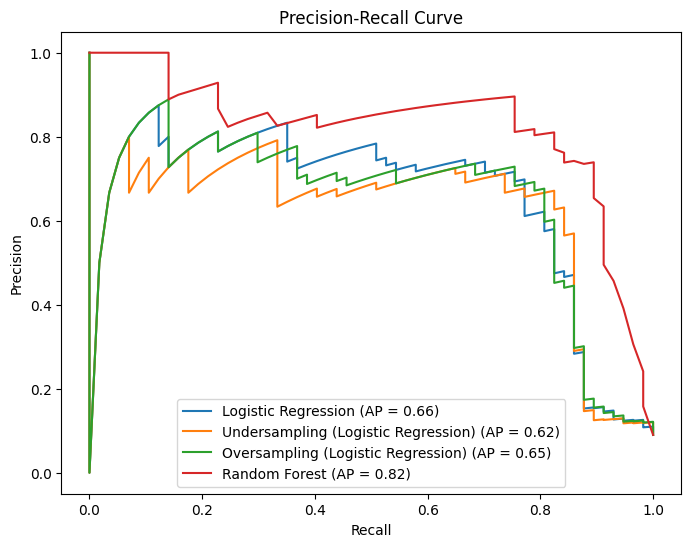

In [120]:
models = {
    "Logistic Regression": LR_baseline,
    "Undersampling (Logistic Regression)": LR_Undersampling,
    "Oversampling (Logistic Regression)": LR_Oversampling,
    "Random Forest": rf
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=1)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f'{name} (AP = {pr_auc:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

## **6. Select the Best Model for Deployment**  
Choose the best model based on **ROC-AUC and PR-AUC scores**. Assume **oversampling model** performed best.

### **6.1 Save the Model**  

In [121]:
import joblib

In [122]:
joblib.dump(rf, "best_model.pkl")


['best_model.pkl']

## **7. Deploy Model using Streamlit**  



**Insert link of your App here.**